Get data.
try multiple clustering algorithms and pplot the profiles

In [1]:
import pandas, seaborn, numpy, pyensembl, scipy

import sklearn, sklearn.cluster
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(8, 4), 'axes.labelsize':20})

# 0. user-defined variables

In [2]:
up_file = '/Users/adrian/gd15/hi/research/osteo/results/up_and_down_DEGs/up.csv'
dorothea_regulons_dir = '/Users/adrian/gd15/hi/research/osteo/data/dorothea/database.txt'

days = [3, 6, 9, 16, 28]

# 1. read data

## 1.1. read expression data

In [3]:
df = pandas.read_csv(up_file, index_col=0)

print(df.shape)
df.head()

(571, 5)


,Day_3,Day_6,Day_9,Day_16,Day_28
ENSG00000000971,-1.664697,0.042064,0.891593,-0.397653,1.128693
ENSG00000001561,-1.066237,-0.413406,-0.413406,0.016602,1.876447
ENSG00000003436,-1.422526,0.188673,-0.614408,0.270184,1.578077
ENSG00000003989,-1.387161,-0.461381,0.080165,0.080165,1.688212
ENSG00000004799,-1.363715,-0.278375,-0.542687,0.655548,1.529228


## 1.2. read TF-gene interactions

In [4]:
db = pandas.read_csv(dorothea_database, sep='\t', usecols=['tf', 'target', 'confidence'])
print(db.shape)
db.head()

(454504, 3)


,tf,confidence,target
1,ADNP,D,ATF7IP
2,ADNP,D,DYRK1A
3,ADNP,D,TLK1
4,ADNP,D,ZMYM4
5,ADNP,D,ABCC1


In [5]:
interactions = db[db['confidence'] != 'E'] # it seems that regulons and condidence D is the same
print(interactions.shape)
interactions.head()

(29086, 3)


,tf,confidence,target
1,ADNP,D,ATF7IP
2,ADNP,D,DYRK1A
3,ADNP,D,TLK1
4,ADNP,D,ZMYM4
5,ADNP,D,ABCC1


In [6]:
regulons_dir = '/Users/adrian/databases/dorothea/regulons/'
import os
regulon_files = os.listdir(regulons_dir)
for file in regulon_files[:50]:
    reg_name = file.split('.txt')[0]
    regulon = pandas.read_csv(regulons_dir+file, sep='\t')
    
    sub = interactions[interactions['tf'] == reg_name]
    print('{} with {} interactions in regulon and {} in db'.format(reg_name, regulon.shape[0], sub.shape[0]))
    #if regulon.shape[0] == 

NOBOX with 543 interactions in regulon and 0 in db
PURA with 443 interactions in regulon and 0 in db
CEBPG with 44 interactions in regulon and 45 in db
ZNF501 with 146 interactions in regulon and 0 in db
ZNF267 with 677 interactions in regulon and 0 in db
ZNF273 with 245 interactions in regulon and 0 in db
FOXS1 with 427 interactions in regulon and 0 in db
KLF11 with 228 interactions in regulon and 0 in db
ZFHX2 with 415 interactions in regulon and 0 in db
BHLHE41 with 361 interactions in regulon and 0 in db
ZNF529 with 439 interactions in regulon and 0 in db
SPIB with 60 interactions in regulon and 61 in db
GZF1 with 205 interactions in regulon and 0 in db
FOXJ3 with 1397 interactions in regulon and 0 in db
HEYL with 426 interactions in regulon and 0 in db
TCF23 with 79 interactions in regulon and 0 in db
ZNF717 with 223 interactions in regulon and 0 in db
NANOG with 48 interactions in regulon and 49 in db
LIN54 with 385 interactions in regulon and 0 in db
TERF2 with 476 interactions 

In [24]:
#CEBPG
pandas.read_csv(regulons_dir+'CEBPG.txt', sep='\t')

,SFTPD
0,AIG1
1,ARHGAP25
2,ATP2A2
3,BRD4
4,CECR2
5,CHN2
6,CLIP1
7,CPQ
8,CREB5
9,CRYZL1


# 2. format data

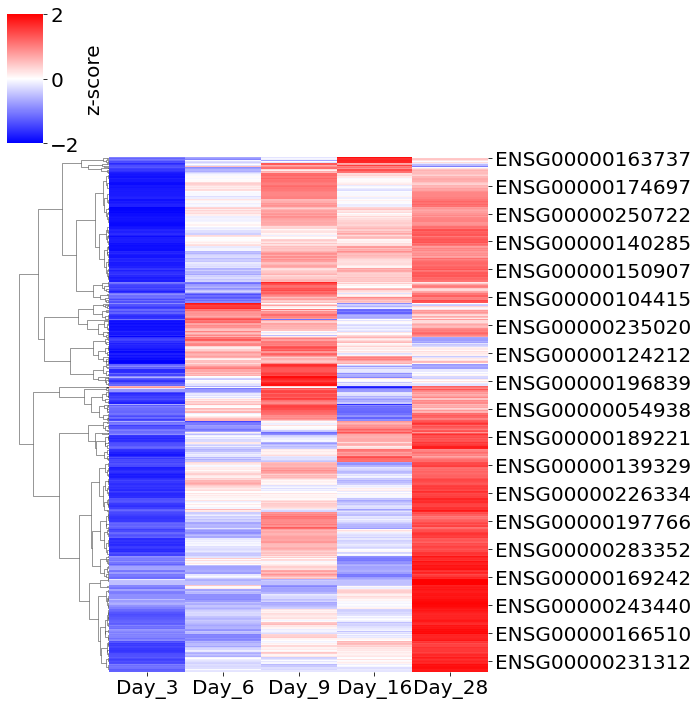

In [7]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.clustermap(df, cmap='bwr', vmin=-2, vmax=2, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

In [8]:
x = df.to_numpy()
x

array([[-1.66469709,  0.04206426,  0.89159335, -0.39765329,  1.12869276],
       [-1.06623701, -0.41340623, -0.41340623,  0.01660241,  1.87644706],
       [-1.42252553,  0.18867304, -0.61440847,  0.27018417,  1.57807679],
       ...,
       [-1.72590115, -0.13345424,  0.99640482, -0.13345424,  0.99640482],
       [-1.91030176,  0.80864717,  0.80864717,  0.14650371,  0.14650371],
       [-1.56690258, -0.25444867,  0.6767522 , -0.25444867,  1.39904771]])

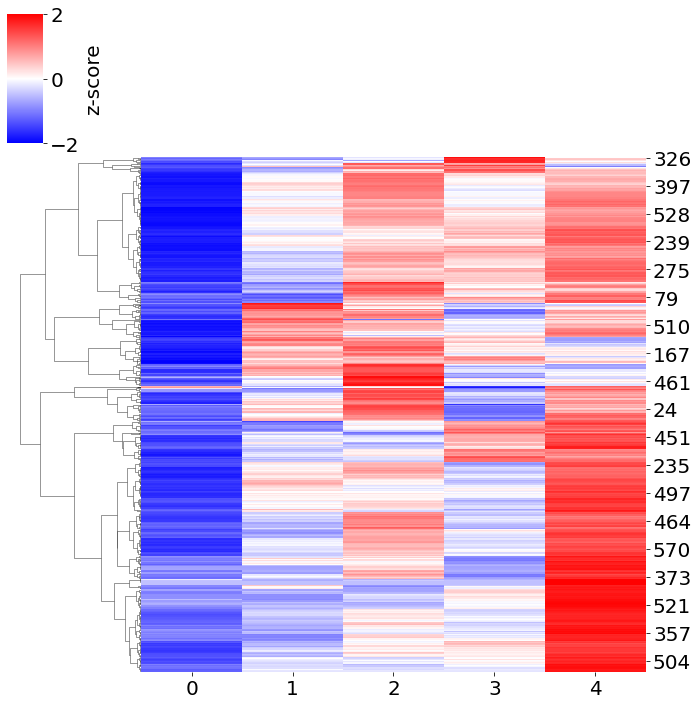

In [9]:
seaborn.clustermap(x, cmap='bwr', vmin=-2, vmax=2, col_cluster=False, method=linkage_method, metric=distance_metric,  cbar_kws={'label':'z-score'})

# 3. define partition range

In [10]:
number_elements = df.shape[0]
fine = int(number_elements/5)
coarse = int(number_elements/20)
print(coarse, fine)
k_range = range(coarse, fine+1)

28 114


# 4. clustering

In [11]:
p_ss = []; p_khi = []; p_dbi = []
for k in k_range:

    partition = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(x)
    labels = partition.labels_

    ss = sklearn.metrics.silhouette_score(x, labels, metric='cosine')
    khi = sklearn.metrics.calinski_harabasz_score(x, labels)
    dbi = sklearn.metrics.davies_bouldin_score(x, labels)

    p_ss.append(ss)
    p_khi.append(khi)
    p_dbi.append(dbi)

In [12]:
# need to do with K means and all other methods present in sklearn that are inductive (?)

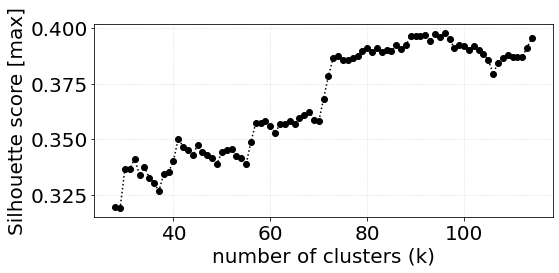

In [13]:
matplotlib.pyplot.plot(k_range, p_ss, 'ok')
matplotlib.pyplot.plot(k_range, p_ss, ':', color='black')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Silhouette score [max]')
matplotlib.pyplot.tight_layout()

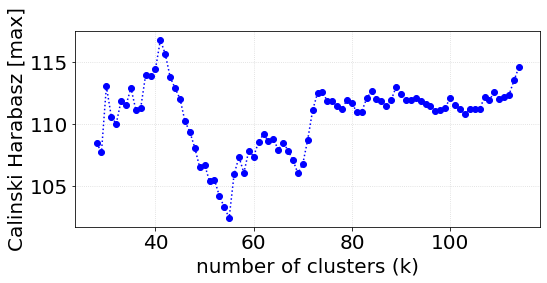

In [14]:
matplotlib.pyplot.plot(k_range, p_khi, 'ob')
matplotlib.pyplot.plot(k_range, p_khi, ':', color='blue')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Calinski Harabasz [max]')
matplotlib.pyplot.tight_layout()

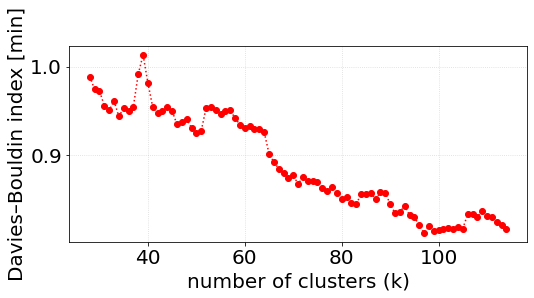

In [15]:
matplotlib.pyplot.plot(k_range, p_dbi, 'or')
matplotlib.pyplot.plot(k_range, p_dbi, ':', color='red')
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.xlabel('number of clusters (k)')
matplotlib.pyplot.ylabel('Davies–Bouldin index [min]')
matplotlib.pyplot.tight_layout()

In [16]:
# visualize 41, otherwise, if not tight enough another much larger like 100

# 5. visualization

In [17]:
# try enrichments in >= 2. Try with k=41 and k=100 

## 5.1. annotation

In [18]:
annotation = pyensembl.EnsemblRelease(86) # better matching than version 100
annotation

EnsemblRelease(release=86, species='homo_sapiens')

In [19]:
# 12 missing for annotation 75
# 9 missing for annotation 86
# 11 missing for annotation 100
# 11 missing for annotation 102
up_genes = df.index.to_list()
rosetta_up_genes = {}

missing = 0
for ensembl in up_genes:
    try:
        gene_name = annotation.gene_by_id(ensembl).gene_name
        rosetta_up_genes[ensembl] = gene_name
    except:
        missing = missing + 1
        print('Missing #{}. {} not found'.format(missing, ensembl))

Missing #1. ENSG00000263238 not found
Missing #2. ENSG00000273707 not found
Missing #3. ENSG00000274619 not found
Missing #4. ENSG00000275482 not found
Missing #5. ENSG00000278843 not found
Missing #6. ENSG00000282147 not found
Missing #7. ENSG00000282854 not found
Missing #8. ENSG00000283009 not found
Missing #9. ENSG00000283106 not found


## 5.2. enrichment

In [20]:
# previous version was 29086 for found targets
# define M, the number of targets in Dorothea
M = interactions.shape[0]
print('found {} targets'.format(M))

# define N, the size of DETs
N = df.shape[0]
print('found {} DETs'.format(N))

found 29086 targets
found 571 DETs


In [21]:
k = 41
partition = sklearn.cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(x)
labels = partition.labels_

In [22]:
k = 41
for label in range(k):
    indices = numpy.where(labels == label)[0]
    print('\nCluster c{} with {} gene indices: {}'.format(label, len(indices), indices))
    cluster = df.iloc[indices, :]
    
    ###
    ### plotting
    ###
#     for gene in cluster.index:
#         matplotlib.pyplot.plot(days, cluster.loc[gene, :], 'o-')
#     matplotlib.pyplot.xlabel('Time (day)')
#     matplotlib.pyplot.ylabel('zscore')
#     matplotlib.pyplot.grid(alpha=0.5, ls=':')
#     matplotlib.pyplot.ylim([-2, 2])
#     matplotlib.pyplot.xlim(([0, 29]))
#     matplotlib.pyplot.tight_layout()
#     matplotlib.pyplot.show()
    
    ###
    ### convert cluster ENSEMBL ids into gene names
    ###
    cluster_ensembl_ids = df.index[indices]
    cluster_gene_names = []
    for ensembl in cluster_ensembl_ids:
        try:
            gene_name = rosetta_up_genes[ensembl]
            cluster_gene_names.append(gene_name)
        except:
            print('ENSEMBL ID {} lost.'.format(ensembl))
    print('{}/{} genes recovered.'.format(len(cluster_gene_names), len(cluster_ensembl_ids)))
    
    
    ###
    ### enrichment
    ###
    
    # get all TFs regulating each target gene
    putative_TFs = []
    for gene_name in cluster_gene_names:
        sub = interactions[(interactions['target'] == gene_name)]
        for element in sub['tf'].to_list():
            putative_TFs.append(element)
    putative_regulators = list(set(putative_TFs))
    print(putative_regulators)
    
    # hypergeometric test for putative regulators
    p_values_uncorrected = []
    for putative_regulator in putative_regulators:
        
        # define n, the number of targets of that particular TF in Dorothea
        global_TF_targets = interactions[interactions['tf'] == putative_regulator]['target'].to_list()
        n = len(global_TF_targets)
        print(putative_regulator, n)
        
        # define x, the number of DETs that are targets of that particular TF
        intersect = list(set(cluster_gene_names) & set(global_TF_targets))
        x = len(intersect)
        
        # make sure that the regulon has at least two target genes for a given TF, otherwise, don't waste hypothesis correction
        if x >= 2:
            pvalue = scipy.stats.hypergeom.sf(x-1, M, n, N)
            p_values_uncorrected.append(pvalue)
            print(x)
            
    # multiple correction for all putative regulators of this cluster: Benjamini–Hochberg correction
    alternative, corrected_p_values = statsmodels.stats.multitest.fdrcorrection(p_values_uncorrected, alpha=0.1)
    print(sum(alternative))
    if sum(alternative) > 0:
        print('HIT')
        print(corrected_p_values)
        print(alternative)



Cluster c0 with 7 gene indices: [ 64 197 240 299 307 347 509]
7/7 genes recovered.
['CXXC4', 'TP53', 'GATA2', 'GLI1', 'ZNF589', 'HOXA9', 'NR1H4', 'ZHX2']
CXXC4 498
2
TP53 248
2
GATA2 40
GLI1 82
ZNF589 422
HOXA9 22
NR1H4 22
ZHX2 498
0

Cluster c1 with 5 gene indices: [173 229 268 409 565]
ENSEMBL ID ENSG00000282147 lost.
4/5 genes recovered.
['ZHX1', 'FOXL2', 'MYC', 'SETBP1', 'EGR1']
ZHX1 495
FOXL2 23
MYC 386
SETBP1 4
EGR1 124
0

Cluster c2 with 3 gene indices: [ 36 225 233]
3/3 genes recovered.
['CEBPG', 'NR5A1', 'NR2F1', 'CEBPD', 'ESRRA', 'ESR1', 'USF1', 'PGR', 'NCOA3', 'ZNF175', 'TERF2', 'CEBPB', 'STAT3', 'TERF1', 'GTF2B', 'MAFG', 'STAT1', 'SP1', 'ZNF750', 'FOXL2', 'NR0B1', 'USF2', 'JUN', 'RARG', 'CREB1', 'NFKB1']
CEBPG 45
NR5A1 15
NR2F1 68
CEBPD 14
ESRRA 69
ESR1 156
USF1 59
PGR 11
NCOA3 23
ZNF175 482
TERF2 477
CEBPB 42
STAT3 75
TERF1 487
GTF2B 497
MAFG 37
STAT1 290
SP1 321
ZNF750 495
FOXL2 23
NR0B1 10
USF2 38
JUN 121
RARG 52
CREB1 75
NFKB1 164
0

Cluster c3 with 12 gene indices: [ 

SP1 321
2
CLOCK 52
NR1H3 12
GLI2 16
SP3 77
TP53 248
2
SPIB 61
E2F1 324
2
ZNF750 495
NR1H2 13
ZNF318 457
EBF1 75
ZHX1 495
CBX2 448
2
KLF2 12
HNF4A 84
2
JUN 121
3
MYC 386
NFKB1 164
NFYA 10
PPARG 41
ETS1 145
0

Cluster c17 with 40 gene indices: [ 10  12  40  42  47  49  84  95  98 128 129 134 135 159 160 179 217 250
 267 275 279 308 314 315 319 364 370 405 413 428 449 452 466 471 490 518
 523 524 554 558]
40/40 genes recovered.
['CXXC4', 'CEBPG', 'ELK1', 'SETDB1', 'HOXA1', 'GLI1', 'IRF2', 'E2F4', 'ATF4', 'ADNP', 'RELA', 'YY1', 'ZNF589', 'MYNN', 'ZNF197', 'HIF1A', 'ZHX2', 'NR2F1', 'SOX13', 'ESR1', 'LYL1', 'FOXP1', 'NFKB1', 'CEBPA', 'USF1', 'AR', 'TBX21', 'BATF', 'ZNF766', 'NR1H4', 'TERF2', 'TEAD4', 'ZNF175', 'ZNF584', 'SPI1', 'TERF1', 'HES1', 'GTF2B', 'CTCFL', 'STAT1', 'CREB3', 'SP1', 'ARID3A', 'VDR', 'TP53', 'ZNF750', 'FOXO3', 'E2F1', 'ZNF83', 'MEIS2', 'ZNF318', 'ZHX1', 'ZNF263', 'JUN', 'HNF4A', 'MYC', 'PPARA', 'ZZZ3', 'ZNF644', 'ZNF207', 'ZNF217']
CXXC4 498
2
CEBPG 45
ELK1 31
SETDB1 461


FOXP1 174
3
STAT5B 16
CEBPA 147
TCF7 61
2
E2F2 14
NCOA3 23
NR5A2 32
MAFB 53
AR 138
3
NME2 476
3
BATF 49
RUNX2 65
ZNF175 482
STAT3 75
SOX6 32
IRF4 68
SPI1 102
2
CTCF 117
FOXO1 43
FOXO4 14
HES1 394
TEAD1 128
ZC3H8 453
3
GTF2B 497
3
TERF1 487
2
MAFG 37
ETV6 116
STAT1 290
E2F3 13
SP1 321
HMGN3 499
SNAI2 66
TP53 248
2
ZNF750 495
3
FOXO3 38
2
FOSL2 10
E2F1 324
MEF2C 73
ZNF263 317
ZNF318 457
FOXK1 85
STAT5A 21
ARNT 63
2
ZNF384 66
CBX2 448
ZHX1 495
HNF4A 84
ZNF644 420
POU5F1 72
0

Cluster c26 with 58 gene indices: [  7   9  14  28  41  50  66  72  75  81 109 113 120 163 168 175 201 204
 205 226 241 242 254 269 270 276 278 296 303 327 342 345 351 360 379 385
 386 389 397 404 418 423 431 439 459 475 476 480 498 514 525 528 546 548
 549 566 567 568]
ENSEMBL ID ENSG00000263238 lost.
ENSEMBL ID ENSG00000282854 lost.
ENSEMBL ID ENSG00000283009 lost.
ENSEMBL ID ENSG00000283106 lost.
54/58 genes recovered.
['CXXC4', 'POU2F1', 'SETDB1', 'GATA2', 'MBD3', 'EHF', 'NFYB', 'ADNP', 'FOS', 'RELA', 'FOXA1', 'Z

# 6. informative cell

In [23]:
import scipy

# M is the population size
# n is the number of successes in the population 
# N is the sample size (previously n)
# x is still the number of drawn “successes”

# M is the total number of targets in Dorothea
# n is the number of targets of a particular TF in Dorothea
# N is the size of DETs
# x is the number of DETs that are targets of a particular TF

M = 20000
n = 200

N = 1000
x = 20 # 10 would be the same ratio


print('p-value <= ' + str(x) + ': ' + str(scipy.stats.hypergeom.cdf(x, M, n, N)))
print('p-value >= ' + str(x)  + ': ' + str(scipy.stats.hypergeom.sf(x-1, M, n, N)))

p-value <= 20: 0.9989104333089479
p-value >= 20: 0.0025301883214874205
